# ***COGITATE_TASK_3***
**Please write the code in Python
Write a code to scrap the laptop data from any one website like Amazon, Flipkart, Reliance.
Data should have laptop specifications, warranty details and price.
Minimum Data of 1500 laptops.
Do an EDA and data cleaning.
Give a few Statistical insights from EDA.
Train a model and optimize to predict the price of laptop given some laptop specifications.**

In [ ]:
!pip install numpy
!pip install bs4
!pip install requests
!pip install pandas
!pip install beautifulsoup4 requests


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [ ]:
URL = "https://www.amazon.in/s?k=laptop&crid=2J6Q8EFO2PNYA&sprefix=lapt%2Caps%2C206&ref=nb_sb_ss_ts-doa-p_2_4"

In [ ]:
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.9'})

In [ ]:
webpage = requests.get(URL, headers=HEADERS)

In [ ]:
print(webpage.content)

b'<html>\n<head>\n<title>503 - Service Unavailable Error</title>\n</head>\n<body bgcolor="#FFFFFF" text="#000000">\n\n<!--\n        To discuss automated access to Amazon data please contact api-services-support@amazon.com.\n        For information about migrating to our APIs refer to our Marketplace APIs at https://developer.amazonservices.in/ref=rm_5_sv, or our Product Advertising API at https://affiliate-program.amazon.in/gp/advertising/api/detail/main.html/ref=rm_5_ac for advertising use cases.\n-->\n\n<center>\n<a href="https://www.amazon.in/ref=cs_503_logo/">\n<img src="https://images-eu.ssl-images-amazon.com/images/G/31/x-locale/communities/people/logo.gif" width=200 height=45 alt="Amazon.in" border=0></a>\n<p align=center>\n<font face="Verdana,Arial,Helvetica">\n<font size="+2" color="#CC6600"><b>Oops!</b></font><br>\n<b>It\'s rush hour and traffic is piling up on that page. Please try again in a short while.<br>If you were trying to place an order, it will not have been process

In [ ]:
type(webpage.content)

bytes

In [ ]:
soup = BeautifulSoup(webpage.content, 'html.parser')

In [ ]:
soup

<html>
<head>
<title>503 - Service Unavailable Error</title>
</head>
<body bgcolor="#FFFFFF" text="#000000">
<!--
        To discuss automated access to Amazon data please contact api-services-support@amazon.com.
        For information about migrating to our APIs refer to our Marketplace APIs at https://developer.amazonservices.in/ref=rm_5_sv, or our Product Advertising API at https://affiliate-program.amazon.in/gp/advertising/api/detail/main.html/ref=rm_5_ac for advertising use cases.
-->
<center>
<a href="https://www.amazon.in/ref=cs_503_logo/">
<img alt="Amazon.in" border="0" height="45" src="https://images-eu.ssl-images-amazon.com/images/G/31/x-locale/communities/people/logo.gif" width="200"/></a>
<p align="center">
<font face="Verdana,Arial,Helvetica">
<font color="#CC6600" size="+2"><b>Oops!</b></font><br/>
<b>It's rush hour and traffic is piling up on that page. Please try again in a short while.<br/>If you were trying to place an order, it will not have been processed at this 

In [ ]:
links = soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

In [ ]:
links

[]

In [ ]:
link = links[0].get('href')

In [ ]:
product_list = "https://amazon.in" + link

In [ ]:
product_list

'https://amazon.in/HP-i5-1235U-15-6-inch-graphics-speakers/dp/B0CTKHTNWL/ref=sr_1_1?crid=2J6Q8EFO2PNYA&dib=eyJ2IjoiMSJ9.oM_WN8-ayAyWPWSMbAEt4YMd61jwsW_z-7NNCCx7XvGXMsOi9sAxzYQaV4d6zHl-J1Dhc5qtZ_gkO4MZCaGYudtufd7LZsD7y2mGBNE4M3qVDdZVmr6XoLENHgLW5uqjLatVrCvlJ3eXE9-icMVWOlGig_PoY9PUQdn8aQ1Nzh14A_HjVhUuU7ShBYP_ErINurWzjxrDNl_nlIt-LnwcASXodvpDZjrXJA3EXaM49b0.GyoUfNK2Z7SgspNPMYs6YAUMvgss88hujkfmF1HB6Qk&dib_tag=se&keywords=laptop&qid=1721207255&sprefix=lapt%2Caps%2C206&sr=8-1'

In [ ]:
new_webpage = requests.get(product_list, headers=HEADERS)

In [ ]:
new_webpage

<Response [200]>

In [ ]:
new_soup = BeautifulSoup(new_webpage.content, 'html.parser')

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--
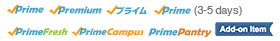
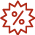

In [ ]:
new_soup

In [ ]:
new_soup.find("span", attrs={'id':'productTitle'})

<span class="a-size-large product-title-word-break" id="productTitle">        HP Laptop 15s, 12th Gen Intel Core i5-1235U, 15.6-inch (39.6 cm), FHD, 16GB DDR4, 512GB SSD, Intel Iris Xe graphics, Backlit KB,MSO,Thin &amp; Light, Dual speakers (Win 11, Silver, 1.69 kg), fq5330TU       </span>

In [ ]:
new_soup.find("span", attrs={'id':'productTitle'}).text.strip()

'HP Laptop 15s, 12th Gen Intel Core i5-1235U, 15.6-inch (39.6 cm), FHD, 16GB DDR4, 512GB SSD, Intel Iris Xe graphics, Backlit KB,MSO,Thin & Light, Dual speakers (Win 11, Silver, 1.69 kg), fq5330TU'

In [ ]:
new_soup.find("span", attrs={'class':'a-price-symbol'}).text.strip() + new_soup.find("span", attrs={'class':'a-price-whole'}).text.strip()

'₹52,525.'

In [ ]:
new_soup.find("span", attrs={'class':'a-label a-checkbox-label'}).text.strip()

'Total Protection Plan for ₹3,299.00'

In [ ]:
new_soup.find("span", attrs={'class':'a-size-small a-color-link a-text-normal'}).text.strip()

'7 days Replacement by Brand'

In [ ]:
def get_title(soup):
    try:
        title = soup.find("span", attrs={"id": 'productTitle'}).text.strip()
    except AttributeError:
        title = ""
    return title

def get_price(soup):
    try:
        price = soup.find("span", attrs={'class': 'a-price-whole'}).text.strip()
    except AttributeError:
        price = ""
    return price

def get_warranty(soup):
    try:
        warranty = soup.find("i", attrs={'class': 'a-size-small a-color-link a-text-normal'}).text.strip()
    except AttributeError:
        try:
            warranty = soup.find("span", attrs={'class': 'a-size-small a-color-link a-text-normal'}).text.strip()
        except AttributeError:
            warranty = ""
    return warranty

if __name__ == '__main__':
    HEADERS = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36',
        'Accept-Language': 'en-US, en;q=0.9'
    }

    URL = "https://www.amazon.in/s?k=laptop&crid=2J6Q8EFO2PNYA&sprefix=lapt%2Caps%2C206&ref=nb_sb_ss_ts-doa-p_2_4"

    webpage = requests.get(URL, headers=HEADERS)
    soup = BeautifulSoup(webpage.content, 'html.parser')
    links = soup.find_all("a", attrs={'class': 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

    links_list = [link.get('href') for link in links]

    d = {"title": [], "price": [], "warranty": []}

    for link in links_list:
        new_webpage = requests.get("https://amazon.in" + link, headers=HEADERS)
        new_soup = BeautifulSoup(new_webpage.content, 'html.parser')

        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['warranty'].append(get_warranty(new_soup))

    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

amazon_df


,title,price,warranty


In [ ]:
if __name__ == '__main__':

    HEADERS = ({'User-Agent':
                'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.9'})


    URL = "https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=54383400-c4ec-4b27-b66e-40201248a3cd&as-searchtext=laptop"

    webpage = requests.get(URL, headers=HEADERS)

    soup = BeautifulSoup(webpage.content, "html.parser")

    links = soup.find_all("a", attrs={'class':'CGtC98'})

    links_list = []

    for link in links:
        links_list.append(link.get('href'))

    d = {"title":[], "price":[], "warranty":[]}

    for link in links_list:
        new_webpage = requests.get("https://flipkart.com" + link, headers=HEADERS)
        new_soup = BeautifulSoup(new_webpage.content, 'html.parser')

        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['warranty'].append(get_rating(new_soup))

    flipkart_df = pd.DataFrame.from_dict(d)
    flipkart_df['title'].replace('', np.nan, inplace=True)
    flipkart_df = amazon_df.dropna(subset=['title'])
    flipkart_df.to_csv("flipkart_data.csv", header=True, index=False)

In [ ]:
amazon_df

,title,price,warranty


In [ ]:
laptops

[]

In [ ]:
soup

<html>
<head>
<title>503 - Service Unavailable Error</title>
</head>
<body bgcolor="#FFFFFF" text="#000000">
<!--
        To discuss automated access to Amazon data please contact api-services-support@amazon.com.
        For information about migrating to our APIs refer to our Marketplace APIs at https://developer.amazonservices.in/ref=rm_5_sv, or our Product Advertising API at https://affiliate-program.amazon.in/gp/advertising/api/detail/main.html/ref=rm_5_ac for advertising use cases.
-->
<center>
<a href="https://www.amazon.in/ref=cs_503_logo/">
<img alt="Amazon.in" border="0" height="45" src="https://images-eu.ssl-images-amazon.com/images/G/31/x-locale/communities/people/logo.gif" width="200"/></a>
<p align="center">
<font face="Verdana,Arial,Helvetica">
<font color="#CC6600" size="+2"><b>Oops!</b></font><br/>
<b>It's rush hour and traffic is piling up on that page. Please try again in a short while.<br/>If you were trying to place an order, it will not have been processed at this 

In [ ]:
url = 'https://www.amazon.in/s?k=laptop&crid=2J6Q8EFO2PNYA&sprefix=lapt%2Caps%2C206&ref=nb_sb_ss_ts-doa-p_2_4'

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

laptops = soup.find_all('div', {'data-component-type': 's-search-result'})

for laptop in laptops:
    title = laptop.find('span', {'class': 'a-size-medium'}).text.strip()
    price = laptop.find('span', {'class': 'a-price-whole'}).text.strip()
    warranty = laptop.find('span', {'class': 'a-text-bold'}).text.strip()

    print(f'Title: {title}\nPrice: {price}\nWarranty: {warranty}\n')


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [30]:
a = '/content/laptop_csv.csv'
df = pd.read_csv(a)

print(df.head())
print(df.info())

                                  title  price  warranty
0      Victus 15-fb0157AX Gaming Laptop  49900         1
1                   15s-fq5007TU Laptop  39900         1
2                  One 14 Z8-415 Laptop  26990         1
3  Yoga Slim 6 14IAP8 82WU0095IN Laptop  59729         1
4       MacBook Air 2020 MGND3HN Laptop  69990         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1698 non-null   object
 1   price     1698 non-null   int64 
 2   warranty  1698 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 39.9+ KB
None


In [31]:
df.dropna(inplace=True)
print(df.isnull().sum())

title       0
price       0
warranty    0
dtype: int64


In [32]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['title'] = df['title'].str.replace('â€Ž', '').str.strip()

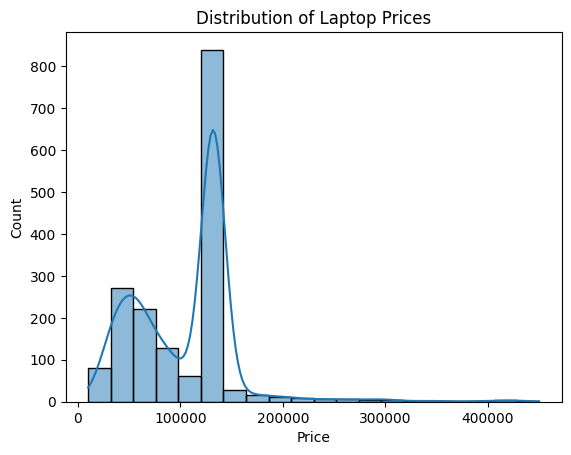

               price     warranty
count    1698.000000  1698.000000
mean   104599.097173     1.041814
std     51234.006244     0.240348
min      9999.000000     0.000000
25%     59990.000000     1.000000
50%    131990.000000     1.000000
75%    131990.000000     1.000000
max    450039.000000     3.000000
title
TUF Gaming A15 2023 FA577XU-LP041WS Gaming Laptop    806
Inspiron 3525 Laptop                                   4
Inspiron 3511 Laptop                                   4
Galaxy Book2 15 Laptop                                 3
Vostro 3425 Laptop                                     3
                                                    ... 
Victus 15-fb0136AX Gaming Laptop                       1
Zenbook 14X OLED 2023 UM5401QA-KM751WS Laptop          1
ROG Flow Z13 2023 GZ301VV-MU014WS Gaming Laptop        1
ROG Strix G16 2023 G614JI-N4151WS Gaming Laptop        1
Pavilion 15s-fq5112TU Laptop                           1
Name: count, Length: 815, dtype: int64


In [33]:
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

print(df.describe())
print(df['title'].value_counts())

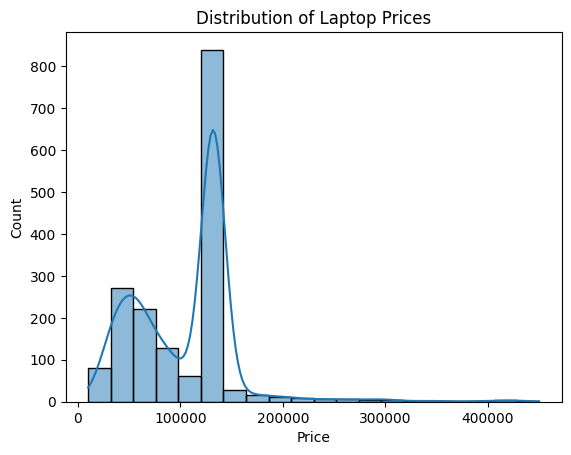

               price     warranty
count    1698.000000  1698.000000
mean   104599.097173     1.041814
std     51234.006244     0.240348
min      9999.000000     0.000000
25%     59990.000000     1.000000
50%    131990.000000     1.000000
75%    131990.000000     1.000000
max    450039.000000     3.000000
title
TUF Gaming A15 2023 FA577XU-LP041WS Gaming Laptop    806
Inspiron 3525 Laptop                                   4
Inspiron 3511 Laptop                                   4
Galaxy Book2 15 Laptop                                 3
Vostro 3425 Laptop                                     3
                                                    ... 
Victus 15-fb0136AX Gaming Laptop                       1
Zenbook 14X OLED 2023 UM5401QA-KM751WS Laptop          1
ROG Flow Z13 2023 GZ301VV-MU014WS Gaming Laptop        1
ROG Strix G16 2023 G614JI-N4151WS Gaming Laptop        1
Pavilion 15s-fq5112TU Laptop                           1
Name: count, Length: 815, dtype: int64


In [34]:
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

print(df.describe())
print(df['title'].value_counts())

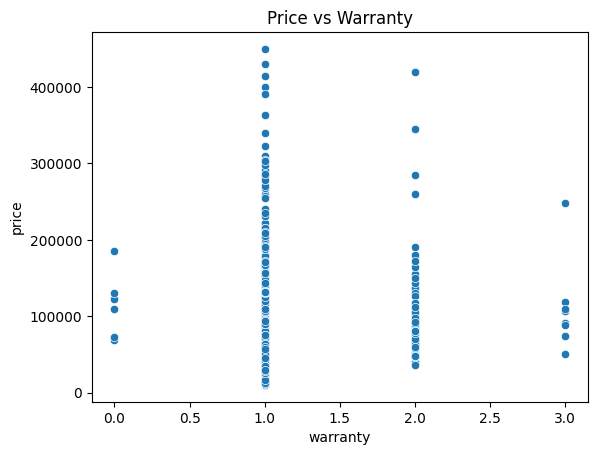

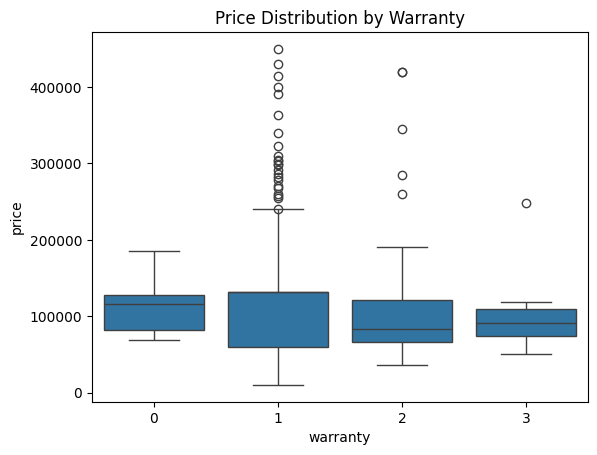

In [35]:
sns.scatterplot(x='warranty', y='price', data=df)
plt.title('Price vs Warranty')
plt.show()

sns.boxplot(x='warranty', y='price', data=df)
plt.title('Price Distribution by Warranty')
plt.show()
